## **Import CSV File**

In [ ]:
import pandas as pd
import numpy as np #Membaca dataset, memproses dataset
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from google.colab import files
import io

In [ ]:
# Read Data
df = pd.read_csv('tweet_earthquake.csv')


In [ ]:
# Menghitung Jumlah Data
df.shape

(1030, 3)

In [ ]:
# Menampilkan Dataframe
df.head(100)

,date,username,text
0,2/7/2023 11:41,Jyot Jeet,"Earthquake leaves over 4,300 Dead in Turkey an..."
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help #Syria and #Turkey this is so ...
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan @AlkhidmatOrgin ...
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA’S VOICE #HelpSyria #PrayforSyria #ea...
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria. \n#earthqu...
...,...,...,...
95,2/8/2023 21:39,Yᴏᴜʀ Fᴀᴠᴏʀɪᴛᴇ Aʟɪᴇɴ,WHY IS TWITTER IN TURKEY NOT AVAILABLE OR BEIN...
96,2/9/2023 3:37,Ammara Awan,Turkish goalkeeper Ahmet Eyup Turkaslan passed...
97,2/9/2023 4:06,tighnari simp,Internet access blocked please help. there are...
98,2/9/2023 5:58,NTV America,Baby born under earthquake rubble named ‘mirac...


# ***Preprocessing***

## ***Cleansing***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from google.colab import files
import io

In [ ]:
# Hapus Tagar & URL
def deleteTagTwitter(text):
  return re.sub(r"[@#]\w+|\||\_|\.n|#", r"", text)
df['text'] = df['text'].apply(lambda x: deleteTagTwitter(x))

def deleteHttps(text):
  return re.sub(r"http\S+", r"", text)
df['text'] = df['text'].apply(lambda x: deleteHttps(x))

def remove_punctuation(text):
  #text
  text= re.sub(r'[^a-zA-z0-9]',' ',str(text))
  text= re.sub(r'\b\w(1,2)\b',' ',text) #menghilangkan 2 kata
  text= re.sub(r'\s\s+',' ',text)
  return text
df['text'] = df['text'].apply(lambda x: remove_punctuation(x))

def cleaning_text(text):
  text = re.sub(r'[@]',r' ',text)
  return text
df['text'] = df['text'].apply(lambda x: cleaning_text(x))

df.head()

,date,username,text
0,2/7/2023 11:41,Jyot Jeet,Earthquake leaves over 4 300 Dead in Turkey an...
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help and this is so sad
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan collaboration wi...
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA S VOICE
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria


## ***Case Folding***

In [ ]:
#df['text'] = df['text'].str.lower()
df['case folding'] = df['text'].str.lower() #Menggunakan fungsi Series.str.lower() pada Pandas

df.head()

,date,username,text,case folding
0,2/7/2023 11:41,Jyot Jeet,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help and this is so sad,god please help and this is so sad
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan collaboration wi...,alkhidmat foundation pakistan collaboration wi...
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA S VOICE,be syria s voice
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria,may allah protect turkey and syria


## ***Tokenizing***

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def word_tokennize_wrapper(text):
  return word_tokenize(text)
df['tokenizing'] = df['case folding'].apply(lambda x: word_tokennize_wrapper(x))

df.head(10)

,date,username,text,case folding,tokenizing
0,2/7/2023 11:41,Jyot Jeet,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...,"[earthquake, leaves, over, 4, 300, dead, in, t..."
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help and this is so sad,god please help and this is so sad,"[god, please, help, and, this, is, so, sad]"
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan collaboration wi...,alkhidmat foundation pakistan collaboration wi...,"[alkhidmat, foundation, pakistan, collaboratio..."
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA S VOICE,be syria s voice,"[be, syria, s, voice]"
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria,may allah protect turkey and syria,"[may, allah, protect, turkey, and, syria]"
5,2/7/2023 12:37,Tajweez Properties PVT LTD.,Prayers for Turkey Syria Lebanon May Allah hel...,prayers for turkey syria lebanon may allah hel...,"[prayers, for, turkey, syria, lebanon, may, al..."
6,2/7/2023 12:39,LogicaBeans,Heartbreaking news from Turkey and Sriya after...,heartbreaking news from turkey and sriya after...,"[heartbreaking, news, from, turkey, and, sriya..."
7,2/7/2023 12:44,Jinnah's Views,Hazrat Ayesha RA Said Powerful 7 8 Cyprus,hazrat ayesha ra said powerful 7 8 cyprus,"[hazrat, ayesha, ra, said, powerful, 7, 8, cyp..."
8,2/7/2023 12:46,Nature,Turkey,turkey,[turkey]
9,2/7/2023 12:58,Pravin. S. Survase,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...,"[earthquake, leaves, over, 4, 300, dead, in, t..."


## **Filtering**

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

list_stopwords = stopwords.words('english')
#Menambahkan stopword manual
list_stopwords.extend(['amp'])

def remove_stopwords(text):
  text = [word for word in text if word not in list_stopwords]
  return text

df['filtering'] = df['tokenizing'].apply(lambda x: remove_stopwords(x))
df.head(25)

,date,username,text,case folding,tokenizing,filtering
0,2/7/2023 11:41,Jyot Jeet,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...,"[earthquake, leaves, over, 4, 300, dead, in, t...","[earthquake, leaves, 4, 300, dead, turkey, syr..."
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help and this is so sad,god please help and this is so sad,"[god, please, help, and, this, is, so, sad]","[god, please, help, sad]"
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan collaboration wi...,alkhidmat foundation pakistan collaboration wi...,"[alkhidmat, foundation, pakistan, collaboratio...","[alkhidmat, foundation, pakistan, collaboratio..."
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA S VOICE,be syria s voice,"[be, syria, s, voice]","[syria, voice]"
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria,may allah protect turkey and syria,"[may, allah, protect, turkey, and, syria]","[may, allah, protect, turkey, syria]"
5,2/7/2023 12:37,Tajweez Properties PVT LTD.,Prayers for Turkey Syria Lebanon May Allah hel...,prayers for turkey syria lebanon may allah hel...,"[prayers, for, turkey, syria, lebanon, may, al...","[prayers, turkey, syria, lebanon, may, allah, ..."
6,2/7/2023 12:39,LogicaBeans,Heartbreaking news from Turkey and Sriya after...,heartbreaking news from turkey and sriya after...,"[heartbreaking, news, from, turkey, and, sriya...","[heartbreaking, news, turkey, sriya, powerful,..."
7,2/7/2023 12:44,Jinnah's Views,Hazrat Ayesha RA Said Powerful 7 8 Cyprus,hazrat ayesha ra said powerful 7 8 cyprus,"[hazrat, ayesha, ra, said, powerful, 7, 8, cyp...","[hazrat, ayesha, ra, said, powerful, 7, 8, cyp..."
8,2/7/2023 12:46,Nature,Turkey,turkey,[turkey],[turkey]
9,2/7/2023 12:58,Pravin. S. Survase,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...,"[earthquake, leaves, over, 4, 300, dead, in, t...","[earthquake, leaves, 4, 300, dead, turkey, syria]"


## **Stemming**

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df['stemmed'] = df['filtering'].apply(lambda x: stemming(x))

df.head(25)

,date,username,text,case folding,tokenizing,filtering,stemmed
0,2/7/2023 11:41,Jyot Jeet,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...,"[earthquake, leaves, over, 4, 300, dead, in, t...","[earthquake, leaves, 4, 300, dead, turkey, syr...","[earthquak, leav, 4, 300, dead, turkey, syria,..."
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help and this is so sad,god please help and this is so sad,"[god, please, help, and, this, is, so, sad]","[god, please, help, sad]","[god, pleas, help, sad]"
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan collaboration wi...,alkhidmat foundation pakistan collaboration wi...,"[alkhidmat, foundation, pakistan, collaboratio...","[alkhidmat, foundation, pakistan, collaboratio...","[alkhidmat, foundat, pakistan, collabor, turki..."
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA S VOICE,be syria s voice,"[be, syria, s, voice]","[syria, voice]","[syria, voic]"
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria,may allah protect turkey and syria,"[may, allah, protect, turkey, and, syria]","[may, allah, protect, turkey, syria]","[may, allah, protect, turkey, syria]"
5,2/7/2023 12:37,Tajweez Properties PVT LTD.,Prayers for Turkey Syria Lebanon May Allah hel...,prayers for turkey syria lebanon may allah hel...,"[prayers, for, turkey, syria, lebanon, may, al...","[prayers, turkey, syria, lebanon, may, allah, ...","[prayer, turkey, syria, lebanon, may, allah, h..."
6,2/7/2023 12:39,LogicaBeans,Heartbreaking news from Turkey and Sriya after...,heartbreaking news from turkey and sriya after...,"[heartbreaking, news, from, turkey, and, sriya...","[heartbreaking, news, turkey, sriya, powerful,...","[heartbreak, news, turkey, sriya, power, earth..."
7,2/7/2023 12:44,Jinnah's Views,Hazrat Ayesha RA Said Powerful 7 8 Cyprus,hazrat ayesha ra said powerful 7 8 cyprus,"[hazrat, ayesha, ra, said, powerful, 7, 8, cyp...","[hazrat, ayesha, ra, said, powerful, 7, 8, cyp...","[hazrat, ayesha, ra, said, power, 7, 8, cypru]"
8,2/7/2023 12:46,Nature,Turkey,turkey,[turkey],[turkey],[turkey]
9,2/7/2023 12:58,Pravin. S. Survase,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...,"[earthquake, leaves, over, 4, 300, dead, in, t...","[earthquake, leaves, 4, 300, dead, turkey, syria]","[earthquak, leav, 4, 300, dead, turkey, syria]"


In [ ]:
# Remove punct
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text
df['tweet_final'] = df['stemmed'].apply(lambda x: remove_punct(x))


In [ ]:
df.to_csv('data_clean.csv', index=False)

In [ ]:
#Read Data Final
data_final = pd.read_csv('data_clean_2.csv')

df.head()

In [ ]:
# Data clean
#hanya select kolom text saja
data_final = df[['stemmed']]

# **Labelling Vader Sentiment**

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd
data = pd.read_csv('data_clean_v2.csv') # Import Dataset Hasil Preprocessing
data = data.dropna()
data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,date,username,text,case folding,tokenizing,filtering,stemmed,tweet_final
0,2/7/2023 11:41,Jyot Jeet,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...,"['earthquake', 'leaves', 'over', '4', '300', '...","['earthquake', 'leaves', '4', '300', 'dead', '...","['earthquak', 'leav', '4', '300', 'dead', 'tur...",earthquak leav 4 300 dead turkey syria peopl l...
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help and this is so sad,god please help and this is so sad,"['god', 'please', 'help', 'and', 'this', 'is',...","['god', 'please', 'help', 'sad']","['god', 'pleas', 'help', 'sad']",god pleas help sad
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan collaboration wi...,alkhidmat foundation pakistan collaboration wi...,"['alkhidmat', 'foundation', 'pakistan', 'colla...","['alkhidmat', 'foundation', 'pakistan', 'colla...","['alkhidmat', 'foundat', 'pakistan', 'collabor...",alkhidmat foundat pakistan collabor turkish pa...
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA S VOICE,be syria s voice,"['be', 'syria', 's', 'voice']","['syria', 'voice']","['syria', 'voic']",syria voic
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria,may allah protect turkey and syria,"['may', 'allah', 'protect', 'turkey', 'and', '...","['may', 'allah', 'protect', 'turkey', 'syria']","['may', 'allah', 'protect', 'turkey', 'syria']",may allah protect turkey syria


In [ ]:
# Hitung Data setelah Preprocessing
data.shape

(1028, 8)

In [ ]:
# Hanya Select Kolom Text Saja
data = data[['tweet_final']]
data.head()

,tweet_final
0,earthquak leav 4 300 dead turkey syria peopl l...
1,god pleas help sad
2,alkhidmat foundat pakistan collabor turkish pa...
3,syria voic
4,may allah protect turkey syria


In [ ]:
sentiments = SentimentIntensityAnalyzer()
#data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet_final"]]
#data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet_final"]]
#data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet_final"]]
data["compound"] = [sentiments.polarity_scores(i)["compound"] for i in data["tweet_final"]]

data.head(10)

,tweet_final,compound
0,earthquak leav 4 300 dead turkey syria peopl l...,-0.7650
1,god pleas help sad,0.1779
2,alkhidmat foundat pakistan collabor turkish pa...,0.0000
3,syria voic,0.0000
4,may allah protect turkey syria,0.3818
5,prayer turkey syria lebanon may allah help pro...,0.6486
6,heartbreak news turkey sriya power earthquak h...,-0.2023
7,hazrat ayesha ra said power 7 8 cypru,0.0000
8,turkey,0.0000
9,earthquak leav 4 300 dead turkey syria,-0.6486


In [ ]:
score = data["compound"].values
sentiment = []
for i in score:
  if i > 0:
    sentiment.append('positif')
  elif i < 0:
    sentiment.append('negatif')
  else:
    sentiment.append('neutral')

data["Sentiment"] = sentiment

data

,tweet_final,compound,Sentiment
0,earthquak leav 4 300 dead turkey syria peopl l...,-0.7650,negatif
1,god pleas help sad,0.1779,positif
2,alkhidmat foundat pakistan collabor turkish pa...,0.0000,neutral
3,syria voic,0.0000,neutral
4,may allah protect turkey syria,0.3818,positif
...,...,...,...
1025,read stori possibl fatal quiescenc told spare ...,-0.6124,negatif
1026,132 613 number peopl impact earthquak wreak de...,0.3400,positif
1027,earthquak creat small canyon instantli turkey ...,0.7650,positif
1028,devast earthquak turkey took countless live ga...,0.4404,positif


In [ ]:
# Save Data Label
data.to_csv('data_label_fix.csv', index=False)

# **Lexicon Based**

1028


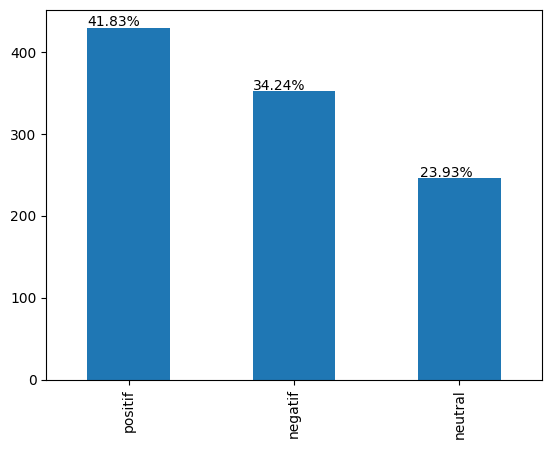

In [ ]:
s = pd.value_counts(data['Sentiment'])
ax = s.plot.bar()
n = len(data.index)
print (n)
for p in ax.patches:
    ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

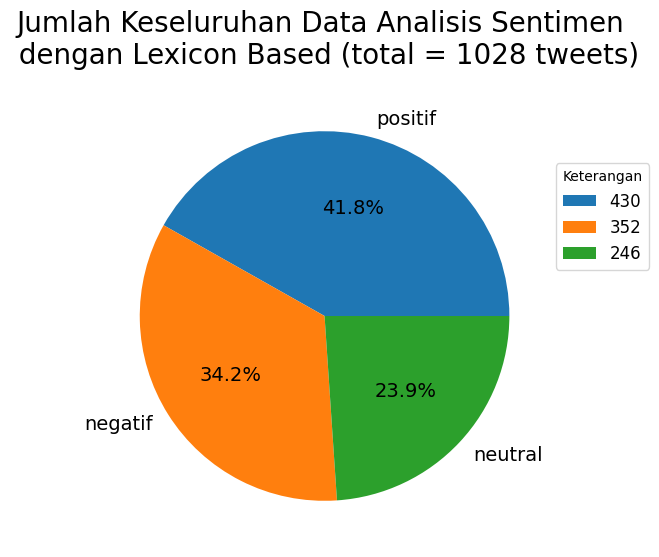

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in data['Sentiment'].value_counts()]
labels = list(data['Sentiment'].value_counts().index)
explode = (0, 0, 0)
mylabels = data['Sentiment'].value_counts()

ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Jumlah Keseluruhan Data Analisis Sentimen \n dengan Lexicon Based (total = 1028 tweets)', fontsize = 20, pad = 15)
plt.legend(title="Keterangan",labels = mylabels, loc = (1, 0.60),fontsize = 12)
plt.show()

## **Wordcloud**

In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

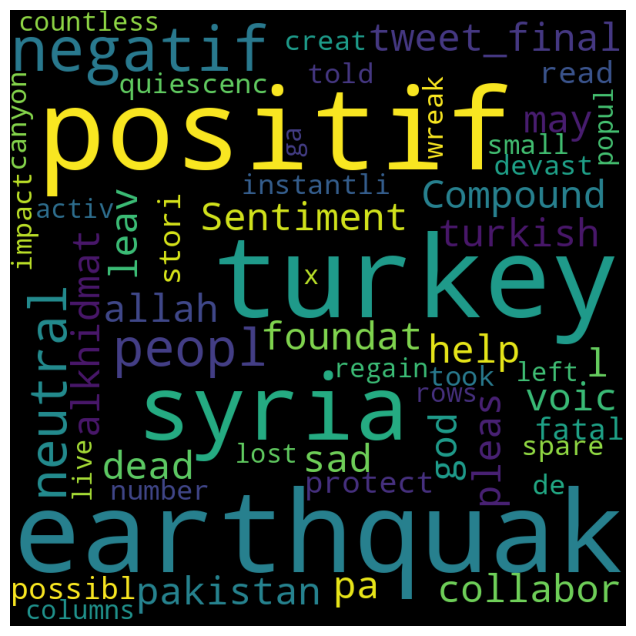

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                      , min_font_size = 20).generate(str(data))
#Plot Wordcloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
def generate_wordcloud(all_words):
    global WorldCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(7, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

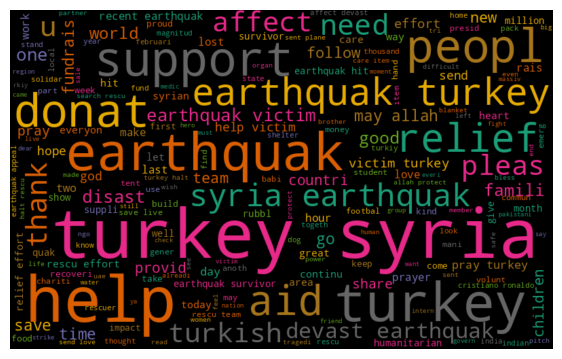

In [ ]:
#Menampilkan Wordcloud Sentimen Positif
all_words = ' '.join([text for text in data['tweet_final'][data.Sentiment == 'positif']])
generate_wordcloud(all_words)

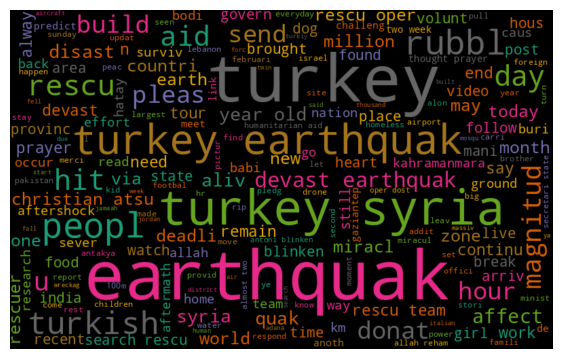

In [ ]:
#Menampilkan Wordcloud Sentimen Netral
all_words = ' '.join([text for text in data['tweet_final'][data.Sentiment == 'neutral']])
generate_wordcloud(all_words)

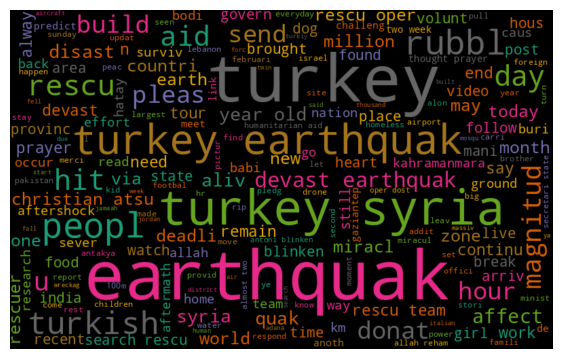

In [ ]:
#Menampilkan Wordcloud Sentimen Negatif
all_words = ' '.join([text for text in data['tweet_final'][data.Sentiment == 'neutral']])
generate_wordcloud(all_words)

# **Perhitungan Akurasi**

In [ ]:
!pip install VaderSentiment
!pip install openpyxl==3.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.8/172.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241190 sha256=02b3933cf9730b35f649e2325c060af08ee4c299a043b7fda42e91a27d578f6a
  Stored in directory: /root/.cache/pip/wheels/f6/e1/96/1c94307cf76f39a48963b26eff2cc0d817e0305c748dc6567f
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10


In [ ]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from openpyxl import Workbook

analyser = SentimentIntensityAnalyzer()

In [ ]:
# Masukkan Data Hasil Label Pakar
#dataset = pd.read_csv('Label_Pakar99.csv')
dataset = pd.read_csv('Data_Label_Pakar.csv')

dataset.head()

,text,label
0,earthquak leav 4 300 dead turkey syria peopl l...,positif
1,god pleas help sad,positif
2,alkhidmat foundat pakistan collabor turkish pa...,neutral
3,syria voic,neutral
4,may allah protect turkey syria,positif


In [ ]:
scores = [analyser.polarity_scores(x) for x in dataset['text']]
dataset['compound_score'] = [x['compound'] for x in scores]
dataset.head()

,text,label,compound_score
0,earthquak leav 4 300 dead turkey syria peopl l...,positif,-0.7650
1,god pleas help sad,positif,0.1779
2,alkhidmat foundat pakistan collabor turkish pa...,neutral,0.0000
3,syria voic,neutral,0.0000
4,may allah protect turkey syria,positif,0.3818


In [ ]:
# Membandingkan Hasil Klasifikasi dengan Vader
dataset.loc[dataset['compound_score'] < 0, 'Sentiments'] = 'negatif'
dataset.loc[dataset['compound_score'] == 0 , 'Sentiments'] = 'neutral'
dataset.loc[dataset['compound_score'] > 0, 'Sentiments'] = 'positif'
dataset.head()

,text,label,compound_score,Sentiments
0,earthquak leav 4 300 dead turkey syria peopl l...,positif,-0.7650,negatif
1,god pleas help sad,positif,0.1779,positif
2,alkhidmat foundat pakistan collabor turkish pa...,neutral,0.0000,neutral
3,syria voic,neutral,0.0000,neutral
4,may allah protect turkey syria,positif,0.3818,positif


## **Hasil Akurasi, Precision, dan Recall**

In [ ]:
from sklearn import metrics
print(metrics.classification_report(dataset['label'], data['Sentiment']))

              precision    recall  f1-score   support

     negatif       0.78      0.56      0.65       493
     neutral       0.22      0.68      0.33        79
     positif       0.72      0.68      0.70       456

    accuracy                           0.62      1028
   macro avg       0.57      0.64      0.56      1028
weighted avg       0.71      0.62      0.65      1028



In [ ]:
from sklearn.metrics import accuracy_score

y_act = dataset['label'].values
y_pred = dataset['Sentiments'].values

accuracy_score(y_act, y_pred)

0.9785992217898832

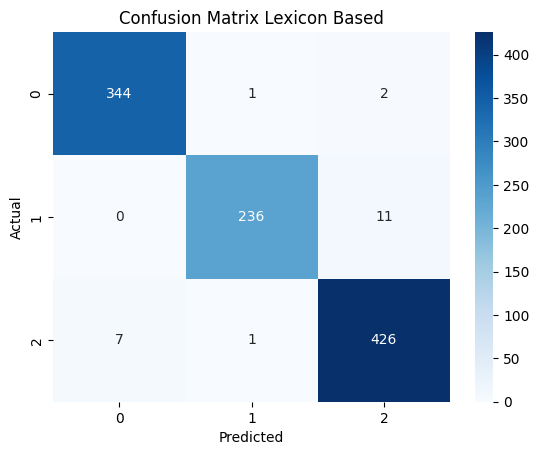

In [ ]:
#Perhitungan Manual Masih error
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_act, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels to the heatmap
plt.xlabel('Predicted') # Auto
plt.ylabel('Actual')    # Label Manual
plt.title('Confusion Matrix Lexicon Based')

# Show the plot
plt.show()